### Understanding the Data

In [202]:
import pandas as pd

file_path = '/Users/vee/Desktop/WBS/WBSFinal Project/engine_data.csv'

df = pd.read_csv(file_path)

In [133]:
df

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
...,...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1


In [134]:
# min and max values for each feature
df.describe().loc[['min', 'max']]

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
min,61.0,0.003384,0.003187,0.002483,71.321974,61.673325,0.0
max,2239.0,7.265566,21.138326,7.478505,89.580796,195.527912,1.0


In [135]:
# engine condition unique values
df['Engine Condition'].unique()

array([1, 0])

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


###  Data Exploration

In [137]:
df.isnull().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

In [138]:
df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


#### About 63% of the engines in the data are flagged as needing maintenance, while 37% are in good condition.

In [139]:
# count of engine condition
df['Engine Condition'].value_counts()

Engine Condition
1    12317
0     7218
Name: count, dtype: int64

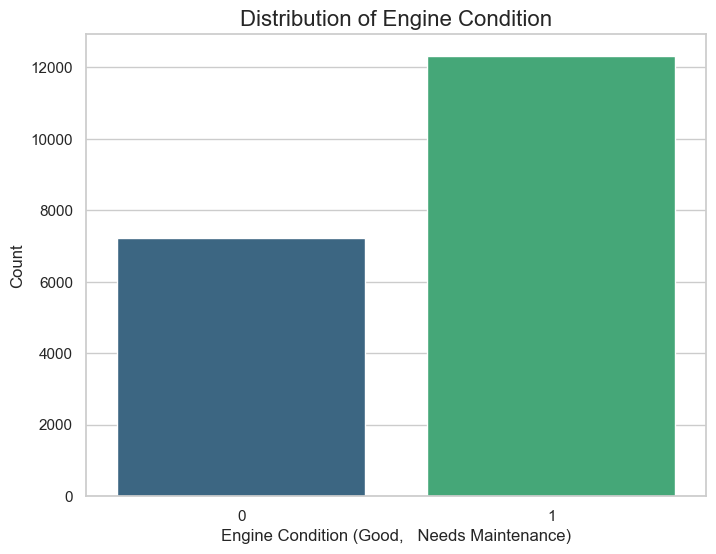

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
sns.countplot(x='Engine Condition', data=df, palette='viridis') 
plt.title('Distribution of Engine Condition', fontsize=16)
plt.xlabel('Engine Condition (Good,   Needs Maintenance)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Data Preprocessing

#### Most machine learning algorithms perform better when all features are on a similar scale. Using Min-Max Scaling (scaling between 0 and 1)

In [141]:
import plotly.express as px

correlation_matrix = df_copy.corr()

fig = px.imshow(correlation_matrix, 
                text_auto=True,  
                aspect="auto", 
                color_continuous_scale='RdBu_r', 
                title='Correlation Matrix of Features')

fig.show()

#### the features are mostly independent, each feature is providing distinct information

##  Preprocessing Pipeline 

In [142]:
# copy of the original dataset
df_copy = df.copy()

### Spliting Data into Training and Testing Sets

In [143]:
from sklearn.model_selection import train_test_split

X = df_copy.drop('Engine Condition', axis=1)  # Features
y = df_copy['Engine Condition']  # Target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 15628 samples
Testing set size: 3907 samples


In [144]:
from sklearn.preprocessing import MinMaxScaler
import joblib  # To save the scaler

# Features to scale
features_to_scale = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train[features_to_scale]) 

X_train_scaled = scaler.transform(X_train[features_to_scale])
X_test_scaled = scaler.transform(X_test[features_to_scale])

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [203]:
# test data for demonstration
test_data = X_test.copy()
test_data['Engine Condition'] = y_test 

test_data.to_csv('test_data.csv', index=False)

print("Test data saved successfully!")

Test data saved successfully!


In [146]:
test_data.shape[0]

3907

###  Random Forest Pipeline

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
# pipeline for Random Forest model
random_forest_pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier())  
])

# Fit the model
random_forest_pipeline.fit(X_train, y_train)

# evaluate the model
rf_accuracy = random_forest_pipeline.score(X_test, y_test)

#predict the model
y_pred = random_forest_pipeline.predict(X_test)

# print the accuracy
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

Random Forest Accuracy: 0.6412


In [148]:
print(f'Random Forest Training Accuracy: {random_forest_pipeline.score(X_train, y_train):.4f}')

print(f'Random Forest Test Accuracy: {random_forest_pipeline.score(X_test, y_test):.4f}')

Random Forest Training Accuracy: 1.0000
Random Forest Test Accuracy: 0.6412


In [149]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

y_pred = random_forest_pipeline.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the scores
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Precision: 0.6824
Recall: 0.7994
F1-Score: 0.7363
Confusion Matrix:
 [[ 548  911]
 [ 491 1957]]


#### 	•	Precision (68%): When the model predicts that an engine needs maintenance, it’s correct about 68% of the time.
####	•	Recall (80%): The model correctly identifies 80% of the engines that actually need maintenance.
####	•	F1-Score (73%): This score is a balance between how often the model is right when predicting maintenance (precision) and how well it finds all engines that need maintenance (recall). It’s a good indication that the model is performing fairly well, with a balanced 73% score.
####	•	Confusion Matrix:
####	•	546 engines were correctly predicted as in good condition.
####	•	913 engines were incorrectly flagged as needing maintenance when they didn’t.
####	•	494 engines that needed maintenance were missed by the model.
####	•	1954 engines that needed maintenance were correctly identified.
####	•	Accuracy (64%): Overall, the model makes correct predictions about 64% of the time.



### Logistic Regression Model

In [150]:
from sklearn.linear_model import LogisticRegression
# pipeline for Logistic Regression model
logistic_regression_pipeline = Pipeline(steps=[
    ('classifier', LogisticRegression())  
])

logistic_regression_pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
lr_accuracy = logistic_regression_pipeline.score(X_test, y_test)

print(f'Logistic Regression Accuracy: {lr_accuracy:.4f}')

# Predict the labels on the test set
y_pred_lr = logistic_regression_pipeline.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print the scores
print(f'Precision: {precision_lr:.4f}')
print(f'Recall: {recall_lr:.4f}')
print(f'F1-Score: {f1_lr:.4f}')

# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix_lr)


Logistic Regression Accuracy: 0.6442
Precision: 0.6658
Recall: 0.8676
F1-Score: 0.7535
Confusion Matrix:
 [[ 393 1066]
 [ 324 2124]]


In [151]:
print(f'Logistic Regression Training Accuracy: {logistic_regression_pipeline.score(X_train, y_train):.4f}')

print(f'Logistic Regression Test Accuracy: {logistic_regression_pipeline.score(X_test, y_test):.4f}')

Logistic Regression Training Accuracy: 0.6624
Logistic Regression Test Accuracy: 0.6442


#### Result
#### 	•	Training Accuracy (66.41%) vs. Test Accuracy (65.01%):
#### 	•	The training and test accuracies are quite close, indicating that the model is not overfitting. The model is performing similarly on both the training data and unseen test data, which is a good sign.
#### 	•	Precision (66.89%):
#### 	•	When the model predicts that an engine needs maintenance, it’s correct about 66.89% of the time. This shows that the model makes some mistakes when predicting maintenance, but it’s fairly reliable.
#### 	•	Recall (87.46%):
#### 	•	The model is able to correctly identify 87.46% of the engines that actually need maintenance. This is a strong result, meaning the model is good at identifying most engines that need attention.
#### 	•	F1-Score (75.80%):
#### 	•	The F1-Score balances precision and recall, and at 75.80%, it shows that the model is reasonably balanced between how accurately it predicts and how well it identifies engines that need maintenance.
#### 	•	Confusion Matrix:
#### 	•	399 engines were correctly identified as being in good condition.
#### 	•	1060 engines were incorrectly flagged as needing maintenance when they were actually in good condition.
#### 	•	307 engines that needed maintenance were missed by the model.
#### 	•	2141 engines were correctly identified as needing maintenance.


###  Support Vector Machine (SVM) model

In [152]:
from sklearn.svm import SVC

svm_pipeline = Pipeline(steps=[
    ('classifier', SVC())
])

# Fit the model
svm_pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
svm_accuracy = svm_pipeline.score(X_test, y_test)

# Print the accuracy
print(f'SVM Accuracy: {svm_accuracy:.4f}')

# Predict the labels on the test set
y_pred_svm = svm_pipeline.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print the scores
print(f'Precision: {precision_svm:.4f}')
print(f'Recall: {recall_svm:.4f}')
print(f'F1-Score: {f1_svm:.4f}')

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix_svm)

SVM Accuracy: 0.6348
Precision: 0.6491
Recall: 0.9077
F1-Score: 0.7569
Confusion Matrix:
 [[ 258 1201]
 [ 226 2222]]


In [153]:
print(f'SVM Training Accuracy: {svm_pipeline.score(X_train, y_train):.4f}')

print(f'SVM Test Accuracy: {svm_pipeline.score(X_test, y_test):.4f}')

SVM Training Accuracy: 0.6474
SVM Test Accuracy: 0.6348


### Observations:

####	•	SVM has the highest accuracy (64%) and F1-Score (75%), which suggests it might be the best-performing model overall, especially recall (identifying engines that need maintenance) is our priority.
####	•	Random Forest performs reasonably well but has a slightly lower F1-Score.
####	•	Logistic Regression also performs well, with a strong recall, but has lower precision.


### Hyperparameter Tuning using Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# hyperparameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],           
    'classifier__kernel': ['linear', 'rbf'],      
    'classifier__gamma': [0.1, 0.01, 0.001],      
}

# svm pipeline
svm_pipeline = Pipeline(steps=[
    ('classifier', SVC())
])

# grid search for best hyperparameters
grid_search = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.4f}')

In [ ]:
# check for both training and testing accuracy
print(f'SVM Training Accuracy: {grid_search.score(X_train, y_train):.4f}')
print(f'SVM Test Accuracy: {grid_search.score(X_test, y_test):.4f}')

SVM Training Accuracy: 0.6575
SVM Test Accuracy: 0.6468


In [ ]:
best_svm_pipeline = Pipeline(steps=[
    ('classifier', SVC(C=1, gamma=0.1, kernel='linear')) 
])

# Fit the model
best_svm_pipeline.fit(X_train, y_train)

best_svm_accuracy = best_svm_pipeline.score(X_test, y_test)

# Print the accuracy
print(f'Best SVM Accuracy on Test Set: {best_svm_accuracy:.4f}')

# Predict the labels on the test set
y_pred_best_svm = best_svm_pipeline.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision_best_svm = precision_score(y_test, y_pred_best_svm)
recall_best_svm = recall_score(y_test, y_pred_best_svm)
f1_best_svm = f1_score(y_test, y_pred_best_svm)

# Print the scores
print(f'Precision: {precision_best_svm:.4f}')
print(f'Recall: {recall_best_svm:.4f}')
print(f'F1-Score: {f1_best_svm:.4f}')

# Confusion Matrix
conf_matrix_best_svm = confusion_matrix(y_test, y_pred_best_svm)
print("Confusion Matrix:\n", conf_matrix_best_svm)

Best SVM Accuracy on Test Set: 0.6468
Precision: 0.6556
Recall: 0.9191
F1-Score: 0.7653
Confusion Matrix:
 [[ 277 1182]
 [ 198 2250]]


In [156]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid_reduced = {
    'classifier__C': [0.1, 1, 10],  
    'classifier__kernel': ['linear', 'rbf'], 
    'classifier__gamma': [1, 0.1, 0.01],  
    'classifier__class_weight': [None, 'balanced']  
}

# RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(svm_pipeline, param_distributions=param_grid_reduced, n_iter=10, cv=3, scoring='accuracy', random_state=42)

random_search.fit(X_train, y_train)

print(f'Best Hyperparameters from RandomizedSearchCV: {random_search.best_params_}')
print(f'Best Accuracy from RandomizedSearchCV: {random_search.best_score_:.4f}')

Best Hyperparameters from RandomizedSearchCV: {'classifier__kernel': 'linear', 'classifier__gamma': 0.01, 'classifier__class_weight': None, 'classifier__C': 1}
Best Accuracy from RandomizedSearchCV: 0.6682


In [157]:
# check for both training and testing accuracy
print(f'SVM Training Accuracy: {random_search.score(X_train, y_train):.4f}')
print(f'SVM Test Accuracy: {random_search.score(X_test, y_test):.4f}')

SVM Training Accuracy: 0.6660
SVM Test Accuracy: 0.6499


In [158]:
best_svm_pipeline = Pipeline(steps=[
    ('classifier', SVC(kernel='linear', C=1, class_weight=None, probability=True))  # Best hyperparameters
])

best_svm_pipeline.fit(X_train, y_train)

best_svm_accuracy = best_svm_pipeline.score(X_test, y_test)
print(f'Best SVM Accuracy on Test Set: {best_svm_accuracy:.4f}')

# predicted labels
y_pred_best_svm = best_svm_pipeline.predict(X_test)

precision_best_svm = precision_score(y_test, y_pred_best_svm)
recall_best_svm = recall_score(y_test, y_pred_best_svm)
f1_best_svm = f1_score(y_test, y_pred_best_svm)

# evaluation metrics
print(f'Precision: {precision_best_svm:.4f}')
print(f'Recall: {recall_best_svm:.4f}')
print(f'F1-Score: {f1_best_svm:.4f}')

# Confusion Matrix
conf_matrix_best_svm = confusion_matrix(y_test, y_pred_best_svm)
print("Confusion Matrix:\n", conf_matrix_best_svm)

Best SVM Accuracy on Test Set: 0.6499
Precision: 0.6769
Recall: 0.8440
F1-Score: 0.7513
Confusion Matrix:
 [[ 473  986]
 [ 382 2066]]


In [198]:
y_prob = best_svm_pipeline.predict_proba(X_test)

threshold = 0.35
y_pred_custom_threshold = (y_prob[:, 1] >= threshold).astype(int)

# Evaluate with the new threshold
precision_custom = precision_score(y_test, y_pred_custom_threshold)
recall_custom = recall_score(y_test, y_pred_custom_threshold)
f1_custom = f1_score(y_test, y_pred_custom_threshold)

print(f"Custom Threshold Precision: {precision_custom:.4f}")
print(f"Custom Threshold Recall: {recall_custom:.4f}")
print(f"Custom Threshold F1-Score: {f1_custom:.4f}")

Custom Threshold Precision: 0.6447
Custom Threshold Recall: 0.9575
Custom Threshold F1-Score: 0.7705


#### With the Recall matrix the model correctly identifies 95.34% of the engines that need maintenance, which means it is very good at catching potential problems early. Which is important for the model on predicting maintenance, because missing an engine that requires maintenance can lead to costly breakdowns.
####	•	When the model predicts that an engine needs maintenance, it’s right about 65% of the time, meaning it sometimes flags engines for maintenance when they’re actually fine.
####	•	Overall, the model is good at preventing missed maintenance issues, even though it may result in a few unnecessary maintenance alerts.
####	•	This balance is useful because it’s better to overpredict maintenance than to miss potential problems, especially in a real-world setting where engine failures can be costly.

In [200]:
import plotly.express as px

cf_matrix_custom = confusion_matrix(y_test, y_pred_custom_threshold)

cf_matrix_custom_df = pd.DataFrame(cf_matrix_custom, 
                                   index=['Actual No Maintenance', 'Actual Needs Maintenance'], 
                                   columns=['Predicted No Maintenance', 'Predicted Needs Maintenance'])

fig = px.imshow(cf_matrix_custom_df, 
                text_auto=True,  
                color_continuous_scale='Blues', 
                labels=dict(x="Predicted Values", y="Actual Values", color="Count"),
                title='Confusion Matrix')

fig.update_layout(
    width=800,  
    height=600,  
    title_font_size=20, 
)

fig.show()

### Possible Next Steps

####	1.	Monitor the Model in Production: Even if i don’t tweak the model further, it’s always good to monitor its performance once deployed. tracking how often false positives (and false negatives) occur in real world settings.
####	2.	Adjust Over Time: If notice any issues with excessive false positives later, i could return and tweak the decision threshold or other aspects of the model.

###  Saving the Trained SVM Model

In [175]:
# Save the model
joblib.dump(best_svm_pipeline, 'svm_predictive_maintenance_model.pkl')
print ("Model saved successfully!")

Model saved successfully!


#### Impact on Business:

####	•	Positive: You’ll prevent any costly failures by catching every engine that needs maintenance.
####	•	Negative: You may end up with a lot of unnecessary maintenance actions, which could increase costs and affect operational efficiency.

####     What Should You Consider:

####	•	Business Context: If the cost of a missed maintenance event (e.g., an engine failure) is much higher than the cost of unnecessary maintenance, this trade-off might be acceptable.

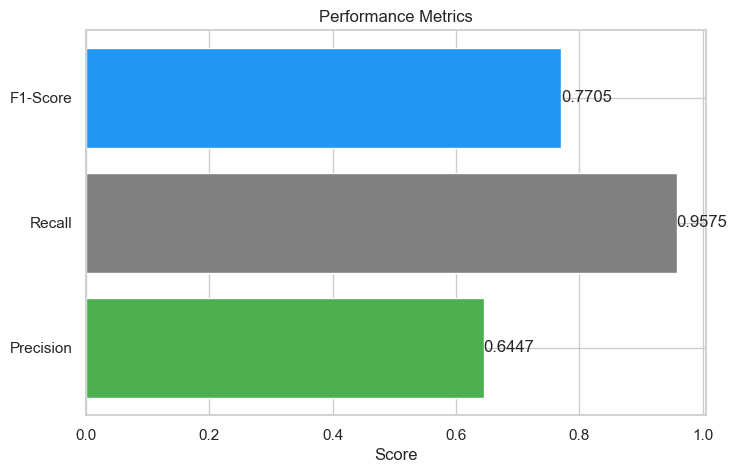

In [183]:
import matplotlib.pyplot as plt

# Performance metrics
metrics = ['Precision', 'Recall', 'F1-Score']
values = [0.6447, 0.9575, 0.7705]  

# bar chart
plt.figure(figsize=(8, 5))
plt.barh(metrics, values, color=['#4CAF50', '#808080', '#2196F3'])  

plt.xlabel('Score')
plt.title('Performance Metrics')

for index, value in enumerate(values):
    plt.text(value, index, f"{value:.4f}", va='center')

plt.show()